# Classification study for the breast cancer dataset

the main goal of this project is to analyse the breast cancer dataset and run some classification methods to predict when a cell is benign or malignant. 
In order of this, we will creat some methods and lists of classification algorithms with its parameters, and we will run its training and compare each of the algorithms results. 

The idea of this study is simply to compare each algorithm in an easy way. So, we wont do any complex parametrization or implement grid search. But these may be done in futures updates.

Algorithms compared in this study:
* Logistic Regression
* Knn Classifier
* Support Vector Machine (linear)
* Support Vector Machine (rbf)
* Support Vector Machine (poly)
* Naive Bayes
* Decision Tree Classifier (entropy)
* Decision Tree Classifier (gini)
* Random Forest Classifier (entropy)
* Random Forest Classifier (gini)
    

## 1) Import the required libraries for this study 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 2) Analyze the dataset

In [2]:
#Importing and understanding the dataset
dataset = pd.read_csv('Data.csv')

dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Since all information available on our dataset is not null, we don't need to do any preprocessing workto fill that data. 

All features seems to be on the same scale, but even so, we will perform the standard scaler process before going to the training methods.

## 3) Prepare the dataset to be used in training

In [10]:
#Separating the dataset into features and classes
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

#Separatign into training and test sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#Standardizing our dataset
ss = StandardScaler()

x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

## 4) Training

### 4.1 Create the list of classification algorithms and it's parameters

In [59]:
clf_lr = LogisticRegression(random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_svc_l = SVC(kernel='linear', random_state=0)
clf_svc_r = SVC(kernel='rbf', random_state=0)
clf_svc_p = SVC(kernel='poly', random_state=0)
clf_gnb = GaussianNB()
clf_dtc_e = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_dtc_g = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_rfc_e = RandomForestClassifier(criterion='entropy', random_state=0)
clf_rfc_g = RandomForestClassifier(criterion='gini', random_state=0)

dict_clf = {
    'Logistic Regression': clf_lr,
    'Knn Classifier': clf_knn,
    'Support Vector Machine (linear)': clf_svc_l,
    'Support Vector Machine (rbf)': clf_svc_r,
    'Support Vector Machine (poly)': clf_svc_p,
    'Naive Bayes': clf_gnb,
    'Decision Tree Classifier (entropy)': clf_dtc_e,
    'Decision Tree Classifier (gini)': clf_dtc_g,
    'Random Forest Classifier (entropy)': clf_rfc_e,
    'Random Forest Classifier (gini)': clf_rfc_g
}

## 4.2) Creating the methods to train the algorithms and to analyze each result through the score metric and the confusion matrix. At the end of all training, the best model for this dataset will be shown with it's score. 

In [40]:
def training_method(clf, x, y):
    clf.fit(x, y)

In [55]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def show_result(clf, x_test, y_test, algorithm):
    scr = round(clf.score(x_test, y_test), 5)
    display = plot_confusion_matrix(clf, x_test, y_test)
    display.ax_.set_title(f'{algorithm} Score: {scr}')
    plt.show()

    return scr

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


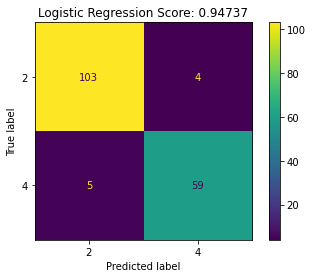

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


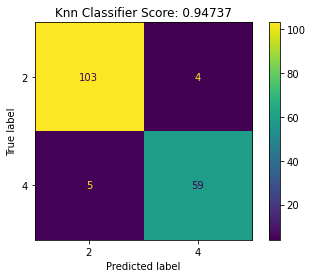

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


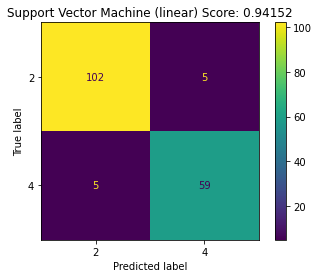

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


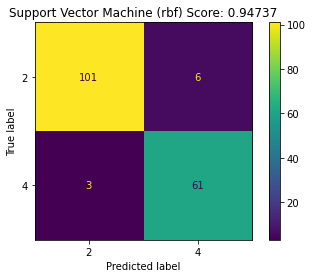

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


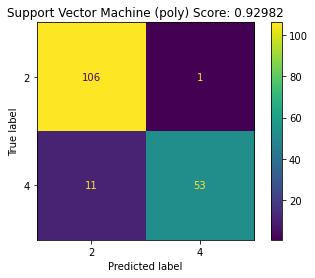

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


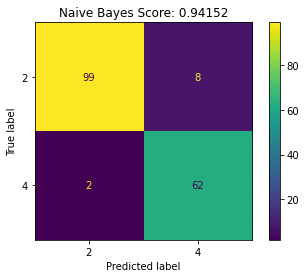

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


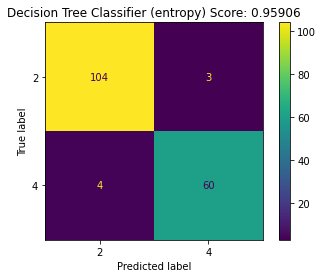

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


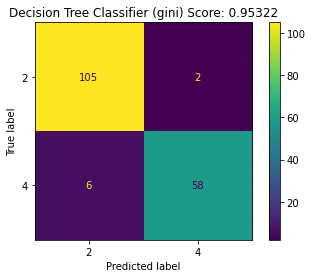

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


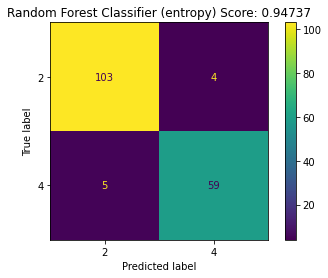

c:\Users\srjne\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


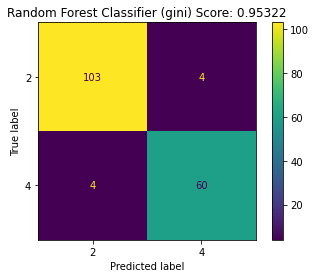



#####################################################################

Best model found for this dataset: Decision Tree Classifier (entropy) 
Score: 0.95906
#####################################################################


In [60]:
max_score = 0.0
best_model = ''

for alg, clf in dict_clf.items():
    training_method(clf=clf, x=x_train_ss, y=y_train)
    scr = show_result(clf=clf, x_test=x_test_ss, y_test=y_test, algorithm=alg)

    if scr > max_score:
        max_score = scr
        best_model = alg

print('\n\n#####################################################################\n')
print(f'Best model found for this dataset: {best_model} \nScore: {max_score}')
print('#####################################################################')

